# Zomato Data Analysis Project

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data= pd.read_csv('Zomato.csv')
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [9]:
def handleRating(value):
    value = str(value).split('/')
    value = value[0];   
    return float(value)

data['rate'] = data['rate'].apply(handleRating)
data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Type of Restaurant')

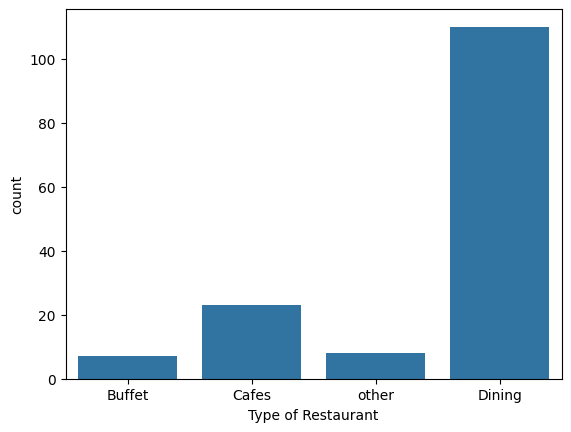

In [17]:
# What type of restaurants do the majority of customers order from ?

sns.countplot(x= data['listed_in(type)'])
plt.xlabel('Type of Restaurant')

Conclusion- Majority of restaurants fall in Dining category.

<Axes: xlabel='Type of Restaurant', ylabel='Votes'>

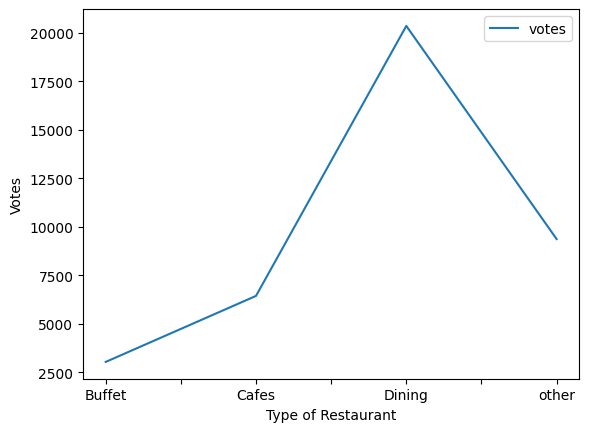

In [23]:
# How many votes has each restaurant received ?

Grouped_data= data.groupby('listed_in(type)')['votes'].sum().reset_index()
Grouped_data

Grouped_data.plot(x='listed_in(type)', y='votes', kind='line', xlabel='Type of Restaurant', ylabel='Votes')

Conclusion- Dining restaurants received the maximum votes.

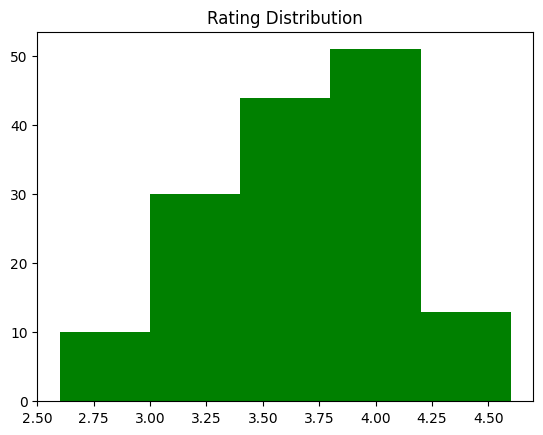

In [32]:
# What are the average ratings of each type of restaurant ? 

plt.hist(data['rate'], bins= 5, color= 'green')
plt.title("Rating Distribution")
plt.show()



Conclusion- Majority of restaurants received ratings between 3.5 and 4.

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

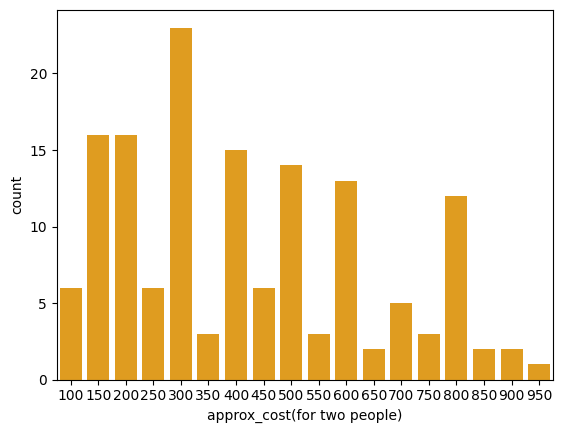

In [39]:
# What is the average spending of two people per order ?

sns.countplot(x= data['approx_cost(for two people)'], color= 'orange')

Conclusion- Majority of couples prefer restaurants with an approximate cost of 300 rs for two.

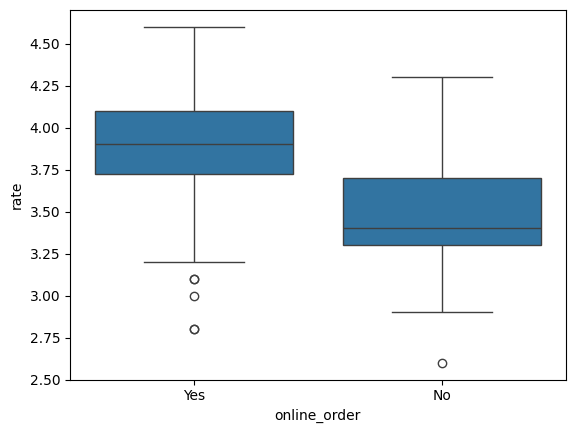

In [43]:
# Which mode online or offline have received maximum ratings ?

sns.boxplot(x= data['online_order'], y= data['rate'])
plt.show()

Conclusion- Online orders receive better ratings in comparison with offline orders.

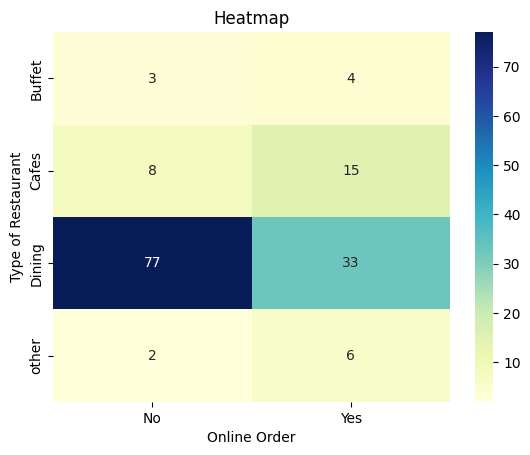

In [49]:
# Which type of restaurant received more offline orders, so Zomato can provide more offers to them ?

Pivot_table= data.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size')
Pivot_table

sns.heatmap(Pivot_table, cmap= 'YlGnBu', annot= True, fmt= 'd')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Type of Restaurant')
plt.show()

Conclusion- Dining restaurants primarily receives offline orders whereas Cafes primarily receives online orders. This suggests that clients prefer to place orders inperson at restaurants but prefer online order for Cafes.